In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import ibex_35_web_scraping 
# Ejecutamos el script de web scraping para actualizar los datos en el arx .csv

In [3]:
df = pd.read_csv("ibex_35.csv")

In [4]:
df.head()

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"141,2000","0,86","141,4000","137,5000",79.222,"11.118,54",08/09/2021,Cierre
1,ACERINOX,"11,4100","-1,21","11,6700","11,4000",598.333,"6.889,33",08/09/2021,Cierre
2,ACS,"23,3500","-0,21","23,6300","23,1100",591.272,"13.810,48",08/09/2021,Cierre
3,AENA,"135,3500","1,31","137,2500","132,2500",201.778,"27.271,11",08/09/2021,Cierre
4,ALMIRALL,"14,6900","0,62","14,8300","14,5400",593.435,"8.708,54",08/09/2021,Cierre


In [5]:
# Método para dar formato (convertible a tipo float) a los strings numéricos del df
def a_num(string):
    return string.replace('.', '').replace(',', '.')

# Método para formatear la fecha, y convertirla en un int que sea comparable. Es decir, 
# que si numéricamente es mayor --> cronológicamente posterior.
def a_fecha_comparativa(string):
    txt = string.split('/')
    txt.reverse()
    txt = ''.join(num for num in txt)
    return txt
    

In [6]:
# Convertimos (utilizando los métodos anteriores) las columnas correspondientes a 'float'
# y la fecha la convertimos a numérica comparable.
for columna in df:
    if columna not in ['Nombre', 'Fecha', 'Hora']:
        df[columna] = df[columna].apply(a_num)
        df[columna] = df[columna].astype('float')
    else:
        pass

df['Fecha'] = df['Fecha'].apply(a_fecha_comparativa)
df['Fecha'] = df['Fecha'].astype('int32')
df.head()

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,141.20,0.86,141.40,137.50,79222.0,11118.54,20210908,Cierre
1,ACERINOX,11.41,-1.21,11.67,11.40,598333.0,6889.33,20210908,Cierre
2,ACS,23.35,-0.21,23.63,23.11,591272.0,13810.48,20210908,Cierre
3,AENA,135.35,1.31,137.25,132.25,201778.0,27271.11,20210908,Cierre
4,ALMIRALL,14.69,0.62,14.83,14.54,593435.0,8708.54,20210908,Cierre


In [13]:
acciona_df = df[df['Nombre']=='ACCIONA'].copy()

In [27]:
acciona_df = acciona_df.reset_index(drop=True)

In [28]:
acciona_df.index

RangeIndex(start=0, stop=3, step=1)

In [29]:
acciona_df.loc[0]['Fecha'] < acciona_df.loc[1]['Fecha']

True

In [30]:
acciona_df.loc[0]

Nombre                 ACCIONA
Últ.                     141.2
% Dif.                    0.86
Máx.                     141.4
Mín.                     137.5
Volumen                79222.0
Efectivo (miles €)    11118.54
Fecha                 20210908
Hora                    Cierre
Name: 0, dtype: object

0    141.2
1    143.4
2    145.9
Name: Últ., dtype: float64


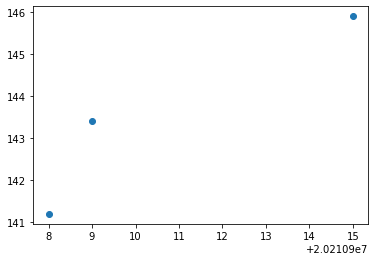

In [41]:
print(acciona_df['Últ.'])

plt.scatter(acciona_df['Fecha'], acciona_df['Últ.'])
